<a href="https://colab.research.google.com/github/Mugunthan98/DS677Project/blob/main/Flickr8k%2BStable_Diffusion_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Prepare the Environment

%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy


  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-jh60522z
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-jh60522z
  Resolved https://github.com/huggingface/diffusers.git to commit 53bd367b039f1bee1255c6db44867f4252b73f7d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 M

In [2]:
### Mount Google Drive & Load Flickr8k Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
### Load Captions

captions_path = "/content/drive/MyDrive/Flickr8k/Flickr8k/captions.txt"

# Load captions into a dictionary
captions_dict = {}
with open(captions_path, "r") as f:
    for line in f:
        img_id, caption = line.strip().split('\t')
        img_id = img_id.split("#")[0]
        if img_id not in captions_dict:
            captions_dict[img_id] = []
        captions_dict[img_id].append(caption)


In [5]:
### Setup Stable Diffusion Pipeline

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


 Prompt: A man sits on a rock cliff with trees in the background .



  0%|          | 0/50 [00:00<?, ?it/s]

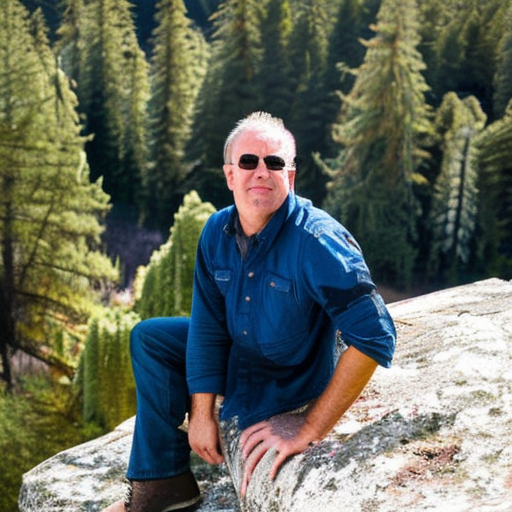

 20%|██        | 1/5 [00:02<00:09,  2.33s/it]


 Prompt: A child climbs to the top of a slide .



  0%|          | 0/50 [00:00<?, ?it/s]

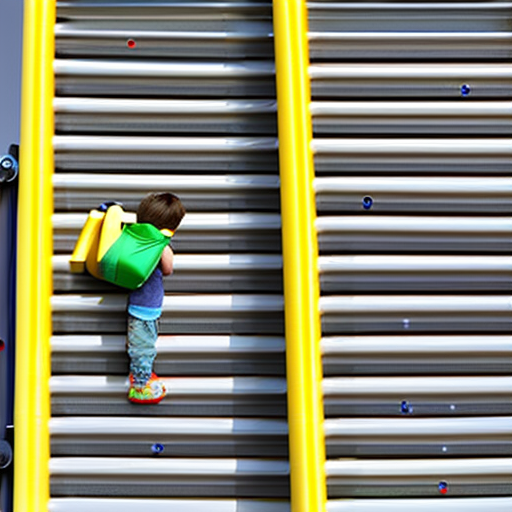

 40%|████      | 2/5 [00:04<00:06,  2.32s/it]


 Prompt: A man wearing a yellow shirt is playing with his black poodle .



  0%|          | 0/50 [00:00<?, ?it/s]

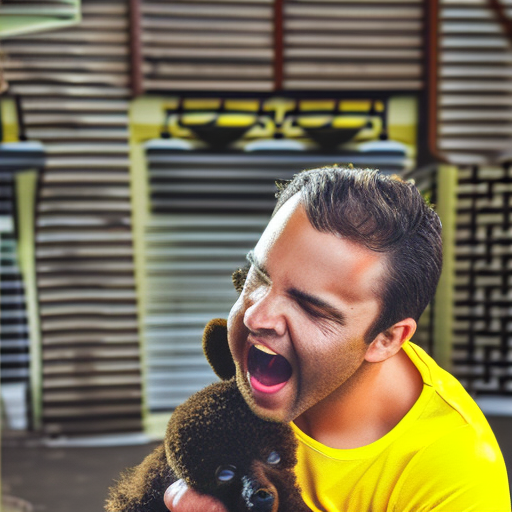

 60%|██████    | 3/5 [00:07<00:04,  2.35s/it]


 Prompt: A white dog standing on leaves on the ground .



  0%|          | 0/50 [00:00<?, ?it/s]

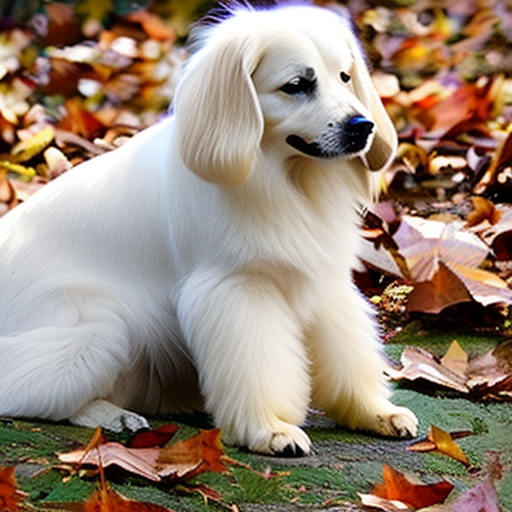

 80%|████████  | 4/5 [00:09<00:02,  2.35s/it]


 Prompt: A group of children are sitting on a raft wearing blue helmets and carrying paddles .



  0%|          | 0/50 [00:00<?, ?it/s]

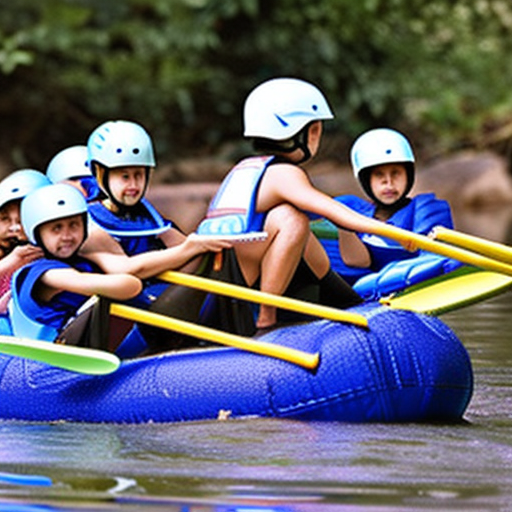

100%|██████████| 5/5 [00:11<00:00,  2.35s/it]


In [13]:
import random
from tqdm import tqdm

# Select 5 random (image_id, caption list) pairs
# Clear any old 'caption' variable if exists
caption = None

# Strictly use Flickr8k captions
random_items = random.sample(list(captions_dict.items()), 5)


for img_id, captions in tqdm(random_items):
    caption = random.choice(captions)
    print(f"\n Prompt: {caption}\n")

    image = pipe(
        caption,
        num_inference_steps=50,
        guidance_scale=7.5,
        height=512,
        width=512
    ).images[0]

    display(image)


  0%|          | 0/5 [00:00<?, ?it/s]


 Prompt: a man and a woman are looking at a painting in a gallery .


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 30.4484


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 31.9653


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 30.2542


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 30.5794


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 26.4990
 Best CLIP score: 31.9653


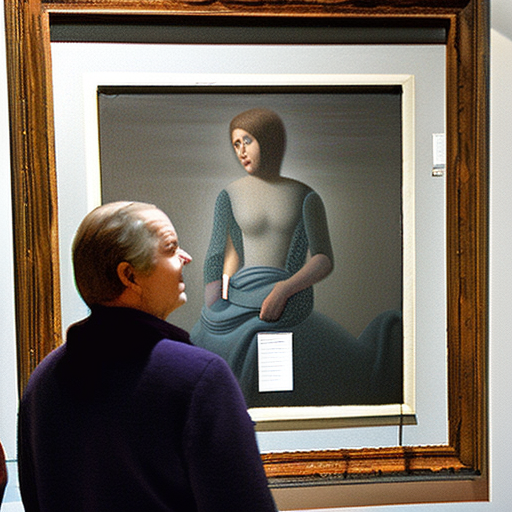

 20%|██        | 1/5 [00:11<00:46, 11.60s/it]


 Prompt: Two black belts sparring , one kicking the other in the face .


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 30.0361


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 29.2244


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 27.3936


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 31.1646


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 27.0711
 Best CLIP score: 31.1646


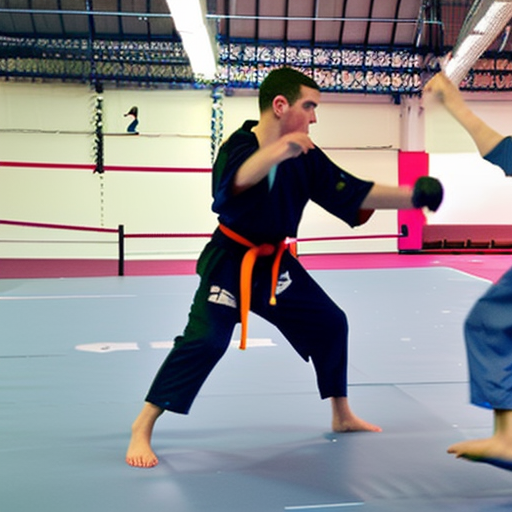

 40%|████      | 2/5 [00:23<00:34, 11.64s/it]


 Prompt: A brown dog runs on the sand carrying a stick .


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 35.4957


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 33.4937


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 33.9349


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 33.7192


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 34.1541
 Best CLIP score: 35.4957


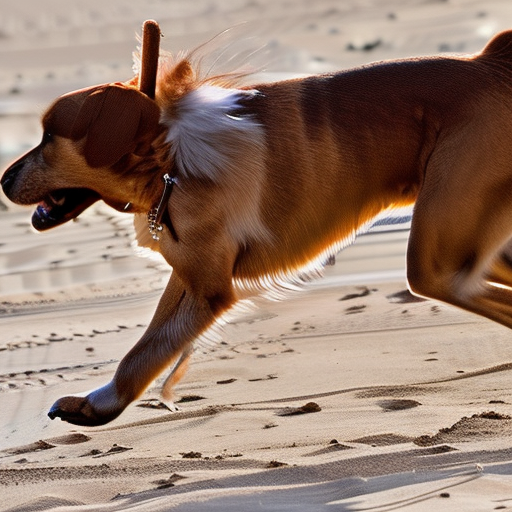

 60%|██████    | 3/5 [00:35<00:23, 11.75s/it]


 Prompt: Two boxers are fighting .


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 28.4016


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 27.3099


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 26.5682


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 26.6626


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 27.6163
 Best CLIP score: 28.4016


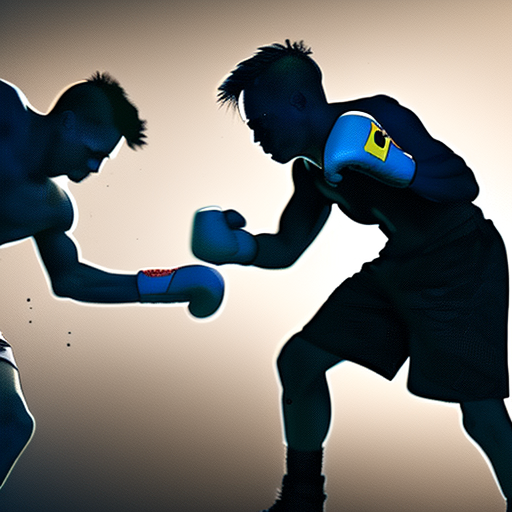

 80%|████████  | 4/5 [00:46<00:11, 11.76s/it]


 Prompt: Policemen are gathered around a glass building .


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 33.2642


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 28.6390


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 29.6315


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 31.2216


  0%|          | 0/50 [00:00<?, ?it/s]

→ CLIP score: 35.7093
 Best CLIP score: 35.7093


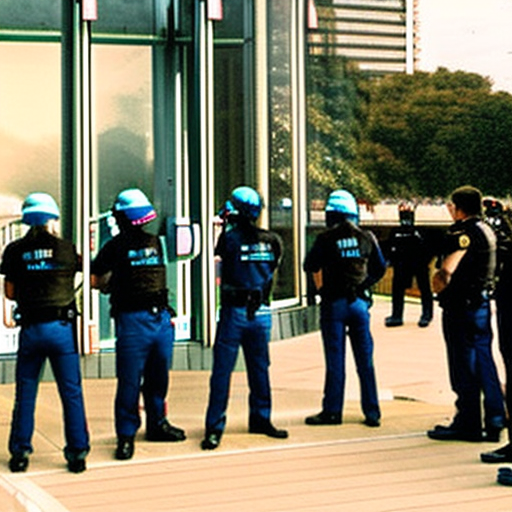

100%|██████████| 5/5 [00:58<00:00, 11.75s/it]


In [12]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from tqdm import tqdm
import random
import torch

# Load CLIP model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cuda")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Function to compute CLIP similarity score
def get_clip_score(image, prompt):
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True).to("cuda")
    outputs = clip_model(**inputs)
    return outputs.logits_per_image.item()  # Higher score = better match

# Generate and select best image for 5 random Flickr8k captions
random_items = random.sample(list(captions_dict.items()), 5)  # Use only Flickr8k captions

for img_id, captions in tqdm(random_items):
    caption = random.choice(captions)  # Choose one of the 5 captions for the image
    print(f"\n Prompt: {caption}")

    best_score = -float("inf")
    best_image = None

    for _ in range(5):  # Generate 5 images for each caption
        image = pipe(
            caption,
            num_inference_steps=50,
            guidance_scale=7.5,
            height=512,
            width=512
        ).images[0]

        score = get_clip_score(image, caption)
        print(f"→ CLIP score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_image = image

    print(f" Best CLIP score: {best_score:.4f}")
    display(best_image)
